In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("./ZipDigits.train")
header = list(data.columns.tolist())
header = header[0].split(" ")
header = header[:-1]
header = [float(i) for i in header]
df_train = pd.DataFrame([header])

for i in range(data.shape[0]):
    temp = list(data.iloc()[i])
    temp = temp[0].split(" ")
    temp = temp[:-1]
    temp = [float(k) for k in temp]
    df_train.loc[i+1] = temp

In [134]:
df_train_labels = pd.DataFrame([df_train.iloc()[0]])
dig1 = 1
dig2 = 5
counter = 0
for i in range(df_train.shape[0]):
    if(df_train[0][i] == dig2 or df_train[0][i] == dig1):
        df_train_labels.loc[counter] = list(df_train.iloc()[i])
        counter+=1

In [135]:
intensities_dig1 = []
intensities_dig2 = []
symmetry_dig1 = []
symmetry_dig2 = []
intensities = []
symmetry = []
y = [] 

for i in range(df_train_labels.shape[0]):
        pix = list(df_train_labels.iloc()[i])
        avg = np.mean(pix[1:])
        arr = np.array(pix[1:])
        image_2d = arr.reshape(16, 16)
        upper_half = image_2d[:8,:]
        lower_half = image_2d[8:,:]
        lower_half_flipped = np.flipud(lower_half)
        avg1 = np.mean(np.absolute(upper_half - lower_half_flipped))
        intensities.append(avg)
        symmetry.append(avg1)
        if(df_train_labels[0][i]==dig1):
            intensities_dig1.append(avg)
            symmetry_dig1.append(avg1)
            y.append(1)
        else:
            intensities_dig2.append(avg)
            symmetry_dig2.append(avg1)
            y.append(-1)
        
labels = np.where(df_train_labels[0]==1, "red", "blue")
df_train_labels.insert(0,"Labels",labels)
df_train_labels.insert(0,"Y",y)
df_train_labels.insert(0,"Intensity",intensities)
df_train_labels.insert(0,"Symmetry",symmetry)
df_train_labels.insert(0,"x0",[1]*df_train_labels.shape[0])
print(len(intensities_dig1), len(symmetry_dig1), len(intensities_dig2), len(symmetry_dig2))
print(df_train_labels)

1005 1005 556 556
      x0  Symmetry  Intensity  Y Labels    0    1    2    3      4  ...  \
0      1  0.840477  -0.111738 -1   blue  5.0 -1.0 -1.0 -1.0 -0.813  ...   
1      1  0.059531  -0.753914  1    red  1.0 -1.0 -1.0 -1.0 -1.000  ...   
2      1  0.070547  -0.772281  1    red  1.0 -1.0 -1.0 -1.0 -1.000  ...   
3      1  0.037000  -0.769258  1    red  1.0 -1.0 -1.0 -1.0 -1.000  ...   
4      1  0.043797  -0.795438  1    red  1.0 -1.0 -1.0 -1.0 -1.000  ...   
...   ..       ...        ... ..    ...  ...  ...  ...  ...    ...  ...   
1556   1  0.585484  -0.289414 -1   blue  5.0 -1.0 -1.0 -1.0 -1.000  ...   
1557   1  0.592164  -0.534238 -1   blue  5.0 -1.0 -1.0 -1.0 -1.000  ...   
1558   1  0.088102  -0.609793  1    red  1.0 -1.0 -1.0 -1.0 -1.000  ...   
1559   1  0.052742  -0.662309  1    red  1.0 -1.0 -1.0 -1.0 -1.000  ...   
1560   1  0.098211  -0.447559  1    red  1.0 -1.0 -1.0 -1.0 -1.000  ...   

        247    248    249    250    251    252    253    254    255  256  
0    -

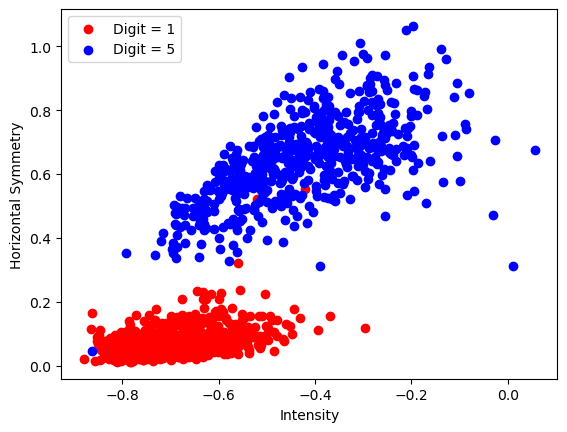

In [136]:
plt.scatter(intensities_dig1, symmetry_dig1, c="red", label="Digit = {}".format(dig1))
plt.scatter(intensities_dig2, symmetry_dig2, c="blue", label="Digit = {}".format(dig2))

plt.xlabel("Intensity")
plt.ylabel("Horizontal Symmetry")
plt.legend()
plt.show()